In [1]:
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
url = "file:///C:/Users/SANKIRTANA/Downloads/iris.data"
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset=pandas.read_csv(url,names=names)

In [3]:
print(dataset.shape)
print(dataset.head(30))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13         

In [4]:
print(dataset.describe())
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


NameError: name 'plot' is not defined

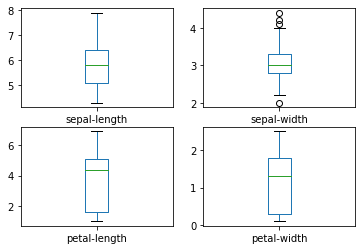

In [5]:
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plot.show()

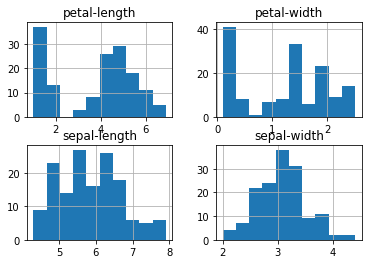

In [6]:
dataset.hist()
plt.show()

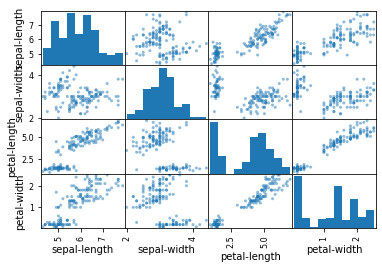

In [7]:
scatter_matrix(dataset)
plt.show()

In [8]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size=0.20
seed = 6 ###seed helps in keeping the same randomness in both train and test###
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [9]:
seed= 6
scoring='accuracy'

In [11]:
scoring='accuracy'
models=[]
models.append(('LR',LogisticRegression()))
models.append(('SVM',SVC()))
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\SANKIRTANA\documents\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\SANKIRTANA\documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\SANKIRTANA\documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

LR: 0.950000 (0.076376)
SVM: 0.950000 (0.076376)


C:\Users\SANKIRTANA\documents\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
